<a href="https://colab.research.google.com/github/JakeOh/202511_BD53/blob/main/lab_python/da15_datetime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataFrame에서 날짜/시간(datetime) 타입 데이터 다루기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SPX 주가 데이터셋

In [2]:
file_path = 'https://github.com/wesm/pydata-book/raw/refs/heads/3rd-edition/examples/spx.csv'

In [3]:
spx = pd.read_csv(file_path)

In [4]:
spx

,Date,SPX
0,1990-02-01 00:00:00,328.79
1,1990-02-02 00:00:00,330.92
2,1990-02-05 00:00:00,331.85
3,1990-02-06 00:00:00,329.66
4,1990-02-07 00:00:00,333.75
...,...,...
5467,2011-10-10 00:00:00,1194.89
5468,2011-10-11 00:00:00,1195.54
5469,2011-10-12 00:00:00,1207.25
5470,2011-10-13 00:00:00,1203.66


In [5]:
spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5472 non-null   object 
 1   SPX     5472 non-null   float64
dtypes: float64(1), object(1)
memory usage: 85.6+ KB


# 문자열 타입의 컬럼을 datetime 타입으로 변환

In [6]:
spx.Date = pd.to_datetime(spx.Date)

In [7]:
spx

,Date,SPX
0,1990-02-01,328.79
1,1990-02-02,330.92
2,1990-02-05,331.85
3,1990-02-06,329.66
4,1990-02-07,333.75
...,...,...
5467,2011-10-10,1194.89
5468,2011-10-11,1195.54
5469,2011-10-12,1207.25
5470,2011-10-13,1203.66


In [8]:
spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5472 non-null   datetime64[ns]
 1   SPX     5472 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.6 KB


# csv 파일에서 DataFrame을 생성할 때 날짜/시간 컬럼과 형식을 지정

In [9]:
spx = pd.read_csv(file_path,
                  parse_dates=['Date'],
                  date_format={'Date': '%Y-%m-%d %H:%M:%S'})

In [10]:
spx

,Date,SPX
0,1990-02-01,328.79
1,1990-02-02,330.92
2,1990-02-05,331.85
3,1990-02-06,329.66
4,1990-02-07,333.75
...,...,...
5467,2011-10-10,1194.89
5468,2011-10-11,1195.54
5469,2011-10-12,1207.25
5470,2011-10-13,1203.66


In [11]:
spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5472 non-null   datetime64[ns]
 1   SPX     5472 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.6 KB


# 기간별(연도별, 분기별, 월별, ...) 통계

In [12]:
# Date 컬럼(datetime 타입)을 인덱스로 변환.
spx_index = spx.set_index('Date')

In [13]:
spx_index

,SPX
Date,
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75
...,...
2011-10-10,1194.89
2011-10-11,1195.54
2011-10-12,1207.25


In [14]:
spx_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5472 entries, 1990-02-01 to 2011-10-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPX     5472 non-null   float64
dtypes: float64(1)
memory usage: 85.5 KB


In [18]:
# 연도별 주가 평균
spx_by_year = spx_index.resample(rule='YE').mean()

In [19]:
spx_by_year.head()

,SPX
Date,
1990-12-31,334.123506
1991-12-31,376.186324
1992-12-31,415.747008
1993-12-31,451.614822
1994-12-31,460.416508


In [20]:
spx_by_year.tail()

,SPX
Date,
2007-12-31,1477.184343
2008-12-31,1220.042055
2009-12-31,948.046389
2010-12-31,1139.965516
2011-12-31,1276.093015


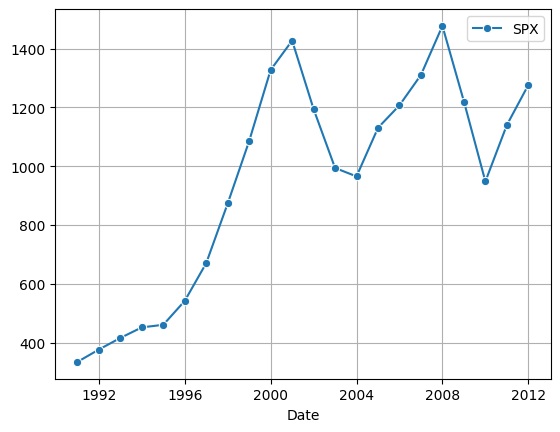

In [25]:
sns.lineplot(data=spx_by_year, marker='o')
plt.grid()
plt.show()

In [27]:
# 분기별 주가 평균
spx_by_quarter = spx_index.resample(rule='QE').mean()

In [28]:
spx_by_quarter.head(n=6)

,SPX
Date,
1990-03-31,334.751951
1990-06-30,349.796508
1990-09-30,335.881746
1990-12-31,316.562031
1991-03-31,352.282951
1991-06-30,378.665937


In [29]:
spx_by_quarter.tail(n=6)

,SPX
Date,
2010-09-30,1096.246875
2010-12-31,1204.585625
2011-03-31,1302.529032
2011-06-30,1318.332857
2011-09-30,1225.268438
2011-12-31,1171.356000


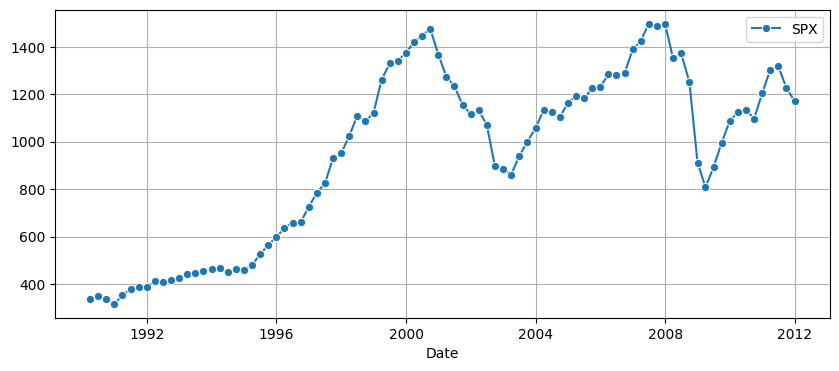

In [32]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=spx_by_quarter, marker='o')
plt.grid()
plt.show()

In [34]:
# 월별 주가 평균
spx_by_month = spx_index.resample(rule='ME').mean()

In [35]:
spx_by_month.head(n=6)

,SPX
Date,
1990-02-28,330.452632
1990-03-31,338.465000
1990-04-30,338.178000
1990-05-31,350.250000
1990-06-30,360.386667
1990-07-31,360.030952


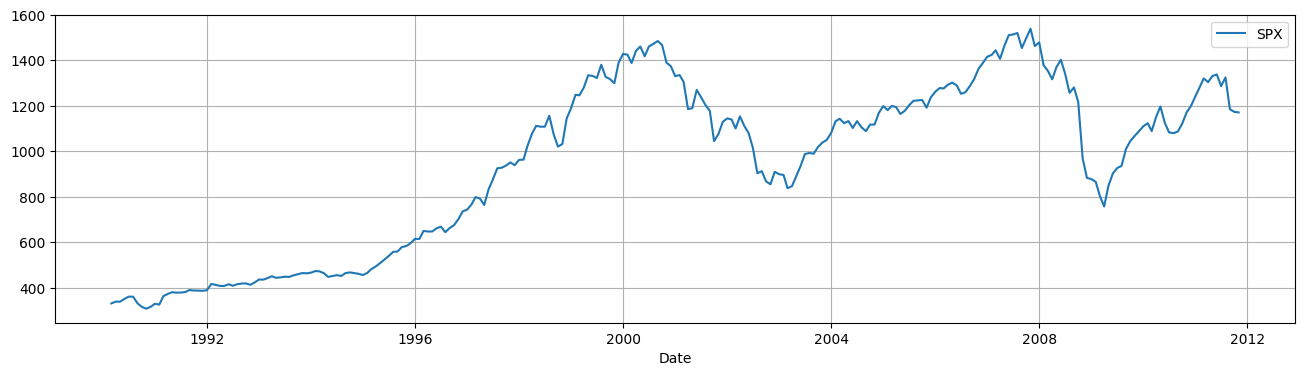

In [37]:
plt.figure(figsize=(16, 4))
sns.lineplot(data=spx_by_month)
plt.grid()
plt.show()

# banklist 데이터셋


*   [banklist.csv](https://github.com/JakeOh/202511_BD53/blob/main/datasets/banklist.csv) 파일을 읽고 데이터프레임을 생성.
*   데이터프레임을 생성할 때 날짜/시간(datetime) 타입으로 변환할 수 있는 모든 컬럼들은 날짜/시간 타입으로 변환.
*   연도별 파산한 은행 숫자 시각화.
*   분기별 파산한 은행 숫자 시각화.
*   월별 파산한 은행 숫자 시각화.
*   기간별 통계는 Closing Date를 기준으로.
